### Credit Scoring Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
# 1. Data Creation (simulate data for credit scoring)
from sklearn.datasets import make_classification

In [6]:
X, y = make_classification(n_samples=1000, n_features=6, n_informative=4, n_redundant=2,
                           n_classes=2, random_state=42)

In [7]:
# Convert to DataFrame
feature_names = ['income', 'debt', 'payment_history', 'loan_amount', 'age', 'credit_utilization']
df = pd.DataFrame(X, columns=feature_names)
df['creditworthy'] = y  # Target variable: 1 = creditworthy, 0 = not

In [8]:
print("Sample Data:")
print(df.head())

Sample Data:
     income      debt  payment_history  loan_amount       age  \
0 -1.700306  0.546738         1.697493     1.020916 -3.568689   
1  0.041412  1.157294         0.140774    -3.193412  2.094181   
2  1.161560 -0.397759        -1.908699    -1.800386  4.323467   
3 -1.486318  1.104109        -1.306469    -4.843622  3.572225   
4  1.916012 -1.199254        -2.594574    -0.640792  5.089422   

   credit_utilization  creditworthy  
0            1.301264             1  
1           -1.021301             0  
2           -2.244412             1  
3           -2.327224             0  
4           -2.763972             1  


In [9]:
# 2. Data Preprocessing
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']

In [10]:
# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


📌 Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       157
           1       0.70      0.73      0.71       143

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

Confusion Matrix:


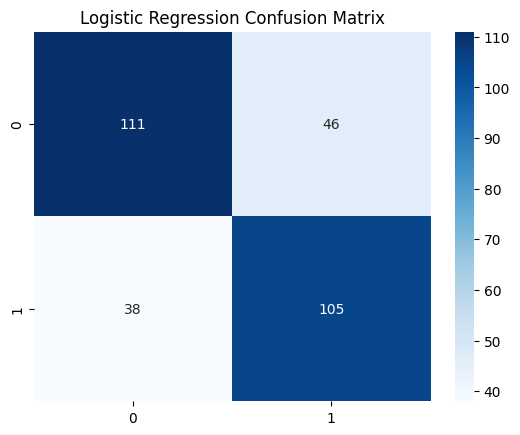


📌 Training Decision Tree...

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       157
           1       0.86      0.90      0.88       143

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Confusion Matrix:


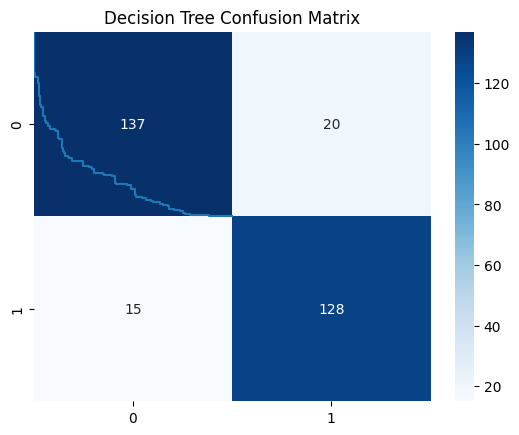


📌 Training Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       157
           1       0.89      0.92      0.91       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix:


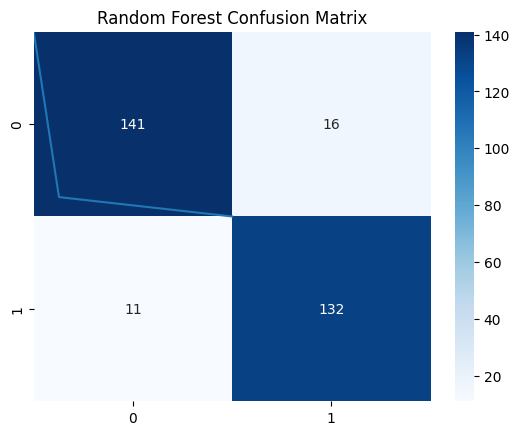

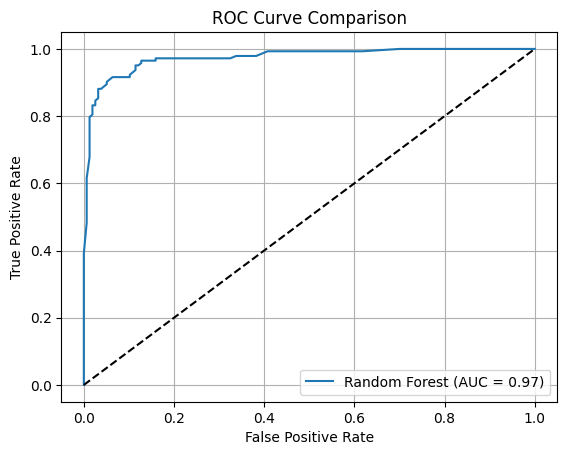


🔍 Model Comparison Summary:
                      roc_auc  precision    recall        f1
Logistic Regression  0.814619   0.695364  0.734266  0.714286
Decision Tree        0.883858   0.864865  0.895105  0.879725
Random Forest        0.973721   0.891892  0.923077  0.907216


In [22]:
# Keep models separate from evaluation results
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# New dictionary to store evaluation results
results = {}

for name, model in models.items():
    print(f"\n📌 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # 5. Evaluation
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Store evaluation results in 'results', not 'models'
    results[name] = {
        "roc_auc": roc_auc,
        "precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "f1": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"]
    }

    # Plot ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot combined ROC after the loop
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Summary Table
print("\n🔍 Model Comparison Summary:")
summary = pd.DataFrame(results).T
print(summary)
